# Imports

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
import glob







# Dataset Loading and Preprocessing

In [ ]:
drive.mount('/content/drive')

#ROOT_DIR = "/content/drive/MyDrive/Spring 2022/DTSC 870/Code" # HC Directory
ROOT_DIR = "/content/drive/MyDrive/DTSC 870/Code" #MT Directory
DATASET_01 = ROOT_DIR + "/datasets/01_MRI/Brain_tumor_images"
DATASET_01_ROOT = ROOT_DIR + "/datasets/01_MRI"
DATASET_01_TRAIN = DATASET_01 + "/train"
DATASET_01_TEST = DATASET_01+ "/test"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datagen = ImageDataGenerator()
image_size = (256, 256)
test_set = datagen.flow_from_directory(DATASET_01_TEST, target_size=image_size, batch_size=32, class_mode='binary', shuffle=False)
train_set = datagen.flow_from_directory(DATASET_01_TRAIN, target_size=image_size, batch_size=32, class_mode='binary')


Found 121 images belonging to 2 classes.
Found 279 images belonging to 2 classes.


In [ ]:
import PIL

image = PIL.Image.open(DATASET_01_TRAIN + "/Normal/Normal (170).jpg")
#image to open

width, height = image.size
print(width, height)


256 256


# Cnn Creation

## Model 1

In [ ]:
def create_model_V1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model


model_1 = create_model_V1()
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 30, 30, 64)       

## Model 2

In [ ]:
def create_model_V2():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

model_2 = create_model_V2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

## Model 3

In [ ]:
#no dropout of V2
def create_model_V3():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_3 = create_model_V3()
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

## Model 4

In [ ]:
def create_model_V4():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_4 = create_model_V4()
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 64)       

## Model 5

In [ ]:
def create_model_V5():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_5 = create_model_V5()
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 flatten_11 (Flatten)        (None, 238144)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               30482560  
                                                     

## Model 6

In [ ]:
def create_model_V6():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_6 = create_model_V6()
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 flatten_12 (Flatten)        (None, 238144)            0         
                                                                 
 dense_24 (Dense)            (None, 128)               30482560  
                                                     

## Model 7

In [ ]:
def create_model_V7():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_7 = create_model_V7()
model_7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 128)     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

## Model 8

In [ ]:
def create_model_V8():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model
model_8 = create_model_V8()
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

# Class Weights

In [ ]:
#modify this 
norm_weight = 400/(2*(118+52))
tumor_weight = 400/(2*(161+69))

class_weights = {0:norm_weight, 1:tumor_weight}

# Compile/Fitting (Example testing, ignore section)


In [ ]:
model = model_6 #Modify diff models

model.compile(optimizer='adam',
                            loss=tf.keras.losses.BinaryCrossentropy(), metrics=['binary_accuracy'])

history = model.fit(x= train_set, epochs=15, class_weight=class_weights) #,validation_data=test_set)


Epoch 1/15
9/9 [==============================] - 11s 1s/step - loss: 0.6944 - binary_accuracy: 0.5305
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 0.6935 - binary_accuracy: 0.5842
Epoch 3/15
9/9 [==============================] - 10s 1s/step - loss: 0.6915 - binary_accuracy: 0.5376
Epoch 4/15
9/9 [==============================] - 10s 1s/step - loss: 0.6872 - binary_accuracy: 0.5627
Epoch 5/15
9/9 [==============================] - 11s 1s/step - loss: 0.6902 - binary_accuracy: 0.5376
Epoch 6/15
9/9 [==============================] - 11s 1s/step - loss: 0.6428 - binary_accuracy: 0.7061
Epoch 7/15
9/9 [==============================] - 10s 1s/step - loss: 0.5292 - binary_accuracy: 0.7240
Epoch 8/15
9/9 [==============================] - 10s 1s/step - loss: 0.4636 - binary_accuracy: 0.7885
Epoch 9/15
9/9 [==============================] - 10s 1s/step - loss: 0.4475 - binary_accuracy: 0.7993
Epoch 10/15
9/9 [==============================] - 10s 1s/step - loss: 0.

Graph of Results

4/4 [==============================] - 3s 540ms/step - loss: 0.4798 - binary_accuracy: 0.7603


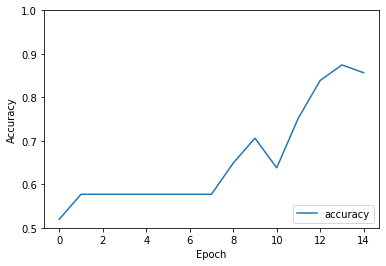

In [ ]:
#76% before
plt.plot(history.history['binary_accuracy'], label='accuracy')
#plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, batch_size = 32)

Confusion Matrix

In [ ]:
#Need to first be able to get True class lables from the flow_from_directory

In [ ]:
predictions = model.predict(test_set)
#print(predictions[1])
predict_final = K.round(predictions)
#predict_final = np.where(predictions >=0.5, 1,0)
#predict_final = np.argmax(predictions, axis = 1)
conf_mat = confusion_matrix(test_set.classes, predict_final)
#predict_final

In [ ]:
#K.mean(K.equal(test_set.classes, predict_final))


In [ ]:
conf_mat_perc = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
class_acc = conf_mat_perc.diagonal()
print(conf_mat)
print(f"Normal accuracy: {class_acc[0]}")
print(f"Tumor accuracy: {class_acc[1]}")


[[46  6]
 [23 46]]
Normal accuracy: 0.8846153846153846
Tumor accuracy: 0.6666666666666666


In [ ]:

target_names = ['Normal', 'Tumor']
print(classification_report(test_set.classes, predict_final, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.67      0.88      0.76        52
       Tumor       0.88      0.67      0.76        69

    accuracy                           0.76       121
   macro avg       0.78      0.78      0.76       121
weighted avg       0.79      0.76      0.76       121



In [ ]:
#test_set.classes

In [ ]:
#predict_final

In [ ]:
from collections import Counter

counter = Counter(train_set.classes)

print(counter.values(), counter.keys()) 

counter2 = Counter(test_set.classes)

print(counter2.values(), counter2.keys()) 


dict_values([118, 161]) dict_keys([0, 1])
dict_values([52, 69]) dict_keys([0, 1])


# Glob for Directory

In [ ]:
import glob

#borrowed from svm code
def get_data_df(dir):
  # modified code from: https://www.kaggle.com/namgalielei/simple-load-images-and-count-number-of-each-class

  train_df = pd.DataFrame()

  trainset = glob.glob(dir)
  #print(trainset)
  train_df['filename'] = [img.split("/")[-4] + "/" + img.split("/")[-3] + "/" + img.split("/")[-2]+"/"+img.split("/")[-1] for img in trainset]
  train_df['label'] = [img.split("/")[-2] for img in trainset]

  return train_df

In [ ]:
test_train = get_data_df(DATASET_01_TRAIN+"/*/*.jpg")
test_train

,filename,label
0,Brain_tumor_images/train/Normal/Normal (58).jpg,Normal
1,Brain_tumor_images/train/Normal/Normal (98).jpg,Normal
2,Brain_tumor_images/train/Normal/Normal (13).jpg,Normal
3,Brain_tumor_images/train/Normal/Normal (26).jpg,Normal
4,Brain_tumor_images/train/Normal/Normal (146).jpg,Normal
...,...,...
274,Brain_tumor_images/train/Tumor/Tumor (170).jpg,Tumor
275,Brain_tumor_images/train/Tumor/Tumor (199).jpg,Tumor
276,Brain_tumor_images/train/Tumor/Tumor (159).jpg,Tumor
277,Brain_tumor_images/train/Tumor/Tumor (194).jpg,Tumor


In [ ]:
aug_train = get_data_df(DATASET_01_ROOT+"/Aug_train/*/*.jpg")
aug_train['filename'] = aug_train['filename'].str[7:]
aug_train

,filename,label
0,Aug_train/Normal/Clock90_Normal (58).jpg,Normal
1,Aug_train/Normal/CounterClock90_Normal (98).jpg,Normal
2,Aug_train/Normal/Clock90_Normal (13).jpg,Normal
3,Aug_train/Normal/Clock90_Normal (26).jpg,Normal
4,Aug_train/Normal/CounterClock90_Normal (146).jpg,Normal
...,...,...
274,Aug_train/Tumor/Clock90_Tumor (170).jpg,Tumor
275,Aug_train/Tumor/Clock90_Tumor (199).jpg,Tumor
276,Aug_train/Tumor/Clock90_Tumor (159).jpg,Tumor
277,Aug_train/Tumor/CounterClock90_Tumor (194).jpg,Tumor


In [ ]:
final_train = test_train.append(aug_train, sort=False, ignore_index=True)

# Sample Code for Validation Folds

Referenced Site: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

In [ ]:
#TO BE MODIFIED

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.graph_objects as go

#Create training csv?
train_data = get_data_df(DATASET_01_TRAIN+"/*/*.jpg")

Y = train_data[['label']]
n = len(train_data)   

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 

#Un needed preprocessing aside from rescale
idg = ImageDataGenerator(rescale=1./255)

#model name
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

#create a directory
save_dir = ROOT_DIR+'/datasets/01_MRI/Saved_CNN_Models/'
img_dir = DATASET_01_TRAIN

fold_var = 1

#n is number of samples, doesn't care about x values for split, just y
for train_index, val_index in skf.split(np.zeros(n),Y):

  #Index value for fold
	training_data = train_data.iloc[train_index]
	validation_data = train_data.iloc[val_index]
  #generator for train
	#print("hi")
	train_data_generator = idg.flow_from_dataframe(training_data, directory = img_dir,
										target_size=(128, 128), batch_size=32,
						       x_col = "filename", y_col = "label",
						       class_mode = "binary", shuffle = True)
	#print("hi")
 #generator for validation
	valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = img_dir,
	            target_size=(128, 128), batch_size=32,
							x_col = "filename", y_col = "label",
							class_mode = "binary", shuffle = True)
	#print("hi")
  #create a method for this
	# CREATE NEW MODEL
	model = create_model_V2()
	# COMPILE NEW MODEL
  #Binary cross entropy, opt will be adam, metric will be binary accuracy?
	model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
		      optimizer='adam',
		      metrics=['binary_accuracy'])
	
	# CREATE CALLBACKS
  #Unsure about checpoint
	checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
							monitor='val_binary_accuracy', verbose=1, 
							save_best_only=True, mode='max')
 
	callbacks_list = [checkpoint]
	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model
	# FIT THE MODEL
  #Include the weights for classes
	history = model.fit(train_data_generator,
			    epochs=15,
			    callbacks=callbacks_list,
			    validation_data=valid_data_generator,
					class_weight = class_weights)
 
	#PLOT HISTORY
  #Plots for whichever
	#		:
	#plt.plot(history.history['binary_accuracy'], label='accuracy')
	#plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
	#plt.xlabel('Epoch')
	#plt.ylabel('Accuracy')
	#plt.ylim([0.3, 1])
	#plt.legend(loc='lower right')
	#plt.show()
	#frame = {'Accuracy': history.history['binary_accuracy'], 'Val_Accuracy': history.history['val_binary_accuracy']}
	#fig = px.line(frame)
	#fig.show()
	fig = go.Figure()
	fig.add_trace(go.Scatter(y= history.history['binary_accuracy'],
                    mode='lines+markers',
                    name='Training Accuracy'))
	fig.add_trace(go.Scatter(y= history.history['val_binary_accuracy'],
                    mode='lines+markers',
                    name='Validation Accuracy'))
	fig.update_yaxes(range=[0.40, 1])
	fig.update_layout(
		title="Fold "+ str(fold_var)+ "'s performance",
		title_x=0.5,
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    autosize=False,
    width=800,
    height=400,
		margin=dict(l=20, r=20, t=40, b=20),)
	fig.show()
	#		:
	# LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights(save_dir+ "model_"+str(fold_var)+".h5")
	
	results = model.evaluate(test_set)
	results = dict(zip(model.metrics_names,results))
	
	VALIDATION_ACCURACY.append(results['binary_accuracy'])
	VALIDATION_LOSS.append(results['loss'])
	
	tf.keras.backend.clear_session()
	
	fold_var += 1

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.0151 - binary_accuracy: 0.5202
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_1.h5
7/7 [==============================] - 11s 1s/step - loss: 1.0151 - binary_accuracy: 0.5202 - val_loss: 0.6926 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6967 - binary_accuracy: 0.5785
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 10s 1s/step - loss: 0.6967 - binary_accuracy: 0.5785 - val_loss: 0.6917 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6918 - binary_accuracy: 0.5785
Epoch 3: val_binary_accuracy did not improve from 0.57143
7/7 [========================

4/4 [==============================] - 1s 309ms/step - loss: 0.5295 - binary_accuracy: 0.7603
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.8526 - binary_accuracy: 0.5336
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_2.h5
7/7 [==============================] - 12s 2s/step - loss: 0.8526 - binary_accuracy: 0.5336 - val_loss: 0.6932 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6917 - binary_accuracy: 0.5740
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 10s 1s/step - loss: 0.6917 - binary_accuracy: 0.5740 - val_loss: 0.6932 - val_binary_accuracy: 0.4107
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6912 - binary_accuracy: 

4/4 [==============================] - 2s 324ms/step - loss: 0.5263 - binary_accuracy: 0.7686
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.1677 - binary_accuracy: 0.4574
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_3.h5
7/7 [==============================] - 12s 1s/step - loss: 1.1677 - binary_accuracy: 0.4574 - val_loss: 0.6937 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6932 - binary_accuracy: 0.4843
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_3.h5
7/7 [==============================] - 10s 1s/step - loss: 0.6932 - binary_accuracy: 0.4843 - val_loss: 0.6927 - val_binary_accurac

4/4 [==============================] - 2s 311ms/step - loss: 0.5769 - binary_accuracy: 0.7273
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.0670 - binary_accuracy: 0.5112
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_4.h5
7/7 [==============================] - 11s 1s/step - loss: 1.0670 - binary_accuracy: 0.5112 - val_loss: 0.6943 - val_binary_accuracy: 0.4107
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6941 - binary_accuracy: 0.4260
Epoch 2: val_binary_accuracy did not improve from 0.41071
7/7 [==============================] - 9s 1s/step - loss: 0.6941 - binary_accuracy: 0.4260 - val_loss: 0.6933 - val_binary_accuracy: 0.4107
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6932 - binary_accuracy: 0

4/4 [==============================] - 1s 309ms/step - loss: 0.6726 - binary_accuracy: 0.7355
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.8118 - binary_accuracy: 0.5134
Epoch 1: val_binary_accuracy improved from -inf to 0.41818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_5.h5
7/7 [==============================] - 11s 1s/step - loss: 0.8118 - binary_accuracy: 0.5134 - val_loss: 0.6936 - val_binary_accuracy: 0.4182
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6970 - binary_accuracy: 0.5312
Epoch 2: val_binary_accuracy improved from 0.41818 to 0.45455, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/model_5.h5
7/7 [==============================] - 9s 1s/step - loss: 0.6970 - binary_accuracy: 0.5312 - val_loss: 0.6934 - val_binary_accuracy

4/4 [==============================] - 1s 321ms/step - loss: 0.5387 - binary_accuracy: 0.7273


# Method Creation for Validation folds of Cnn models


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

#train_data = get_data_df(DATASET_01_TRAIN+"/*/*.jpg")
#Y = train_data[['label']]

Y = final_train[['label']]
n = len(final_train)   

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 

#Un needed preprocessing aside from rescale
idg = ImageDataGenerator(rescale=1./255)

#model name
def get_model_name(k):
    return 'model_'+str(k)+'.h5'
def model_test(fold_count, epoch, model_method, image_size):
  skf = StratifiedKFold(n_splits = fold_count, random_state = 7, shuffle = True)
  train_data = get_data_df(DATASET_01_TRAIN+"/*/*.jpg")
  #Incorperate preprocessing in the method 
  #####################################################################
  aug_train = get_data_df(DATASET_01_ROOT+"/Aug_train/*/*.jpg")
  aug_train['filename'] = aug_train['filename'].str[7:]
  final_train = test_train.append(aug_train, sort=False, ignore_index=True)


  #######################################################################
  #idg = ImageDataGenerator(rescale=1./255)
  idg = ImageDataGenerator()
  Y = final_train[['label']]
  n = len(final_train)    
  VALIDATION_ACCURACY = []
  VALIDATION_LOSS = []

  #create a directory
  save_dir = ROOT_DIR+'/datasets/01_MRI/Saved_CNN_Models/Testing/'+model_method.__name__+'/AugTest'+'/'+str(epoch)+'epochs/'
  img_dir = DATASET_01_ROOT

  fold_var = 1

  #n is number of samples, doesn't care about x values for split, just y
  for train_index, val_index in skf.split(np.zeros(n),Y):

    #Index value for fold
    training_data = final_train.iloc[train_index]
    validation_data = final_train.iloc[val_index]
    #generator for train
    #print("hi")
    #Modify the training size, have an input adjustability 
    train_data_generator = idg.flow_from_dataframe(training_data, directory = img_dir,
                      target_size=image_size, batch_size=32,
                    x_col = "filename", y_col = "label",
                    class_mode = "binary", shuffle = True)
    #print("hi")
    #generator for validation
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = img_dir,
                target_size=image_size, batch_size=32,
                x_col = "filename", y_col = "label",
                class_mode = "binary", shuffle = True)
    #print("hi")
    #create a method for this
    # CREATE NEW MODEL
    model = model_method()
    # COMPILE NEW MODEL
    #Binary cross entropy, opt will be adam, metric will be binary accuracy?
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
            metrics=['binary_accuracy'])
    
    # CREATE CALLBACKS
    #Unsure about checpoint
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+model_method.__name__+"_"+get_model_name(fold_var), 
                monitor='val_binary_accuracy', verbose=1, 
                save_best_only=True, mode='max')
  
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    #Include the weights for classes
    history = model.fit(train_data_generator,
            epochs=epoch,
            callbacks=callbacks_list,
            validation_data=valid_data_generator,
            class_weight = class_weights)
  
    #PLOT HISTORY
    #Plots for whichever
    #		:
    #plt.plot(history.history['binary_accuracy'], label='accuracy')
    #plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
    #plt.xlabel('Epoch')
    #plt.ylabel('Accuracy')
    #plt.ylim([0.3, 1])
    #plt.legend(loc='lower right')
    #plt.show()
    #frame = {'Accuracy': history.history['binary_accuracy'], 'Val_Accuracy': history.history['val_binary_accuracy']}
    #fig = px.line(frame)
    #fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(y= history.history['binary_accuracy'],
                      mode='lines+markers',
                      name='Training Accuracy'))
    fig.add_trace(go.Scatter(y= history.history['val_binary_accuracy'],
                      mode='lines+markers',
                      name='Validation Accuracy'))
    fig.update_yaxes(range=[0.40, 1])
    fig.update_layout(
      title="Fold "+ str(fold_var)+ "'s performance",
      title_x=0.5,
      xaxis_title="Epochs",
      yaxis_title="Accuracy",
      autosize=False,
      width=800,
      height=400,
      margin=dict(l=20, r=20, t=40, b=20),)
    fig.show()
    #		:
    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights(save_dir+model_method.__name__+"_" + "model_"+str(fold_var)+".h5")
    
    results = model.evaluate(test_set)
    results = dict(zip(model.metrics_names,results))
    
    VALIDATION_ACCURACY.append(results['binary_accuracy'])
    VALIDATION_LOSS.append(results['loss'])
    
    tf.keras.backend.clear_session()
    
    fold_var += 1

## Testing model 1


In [ ]:
model_test(5,15,create_model_V1)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.2147 - binary_accuracy: 0.4888
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_1.h5
7/7 [==============================] - 10s 1s/step - loss: 1.2147 - binary_accuracy: 0.4888 - val_loss: 0.6893 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6906 - binary_accuracy: 0.5561
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 8s 1s/step - loss: 0.6906 - binary_accuracy: 0.5561 - val_loss: 0.6934 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6918 - binary_accuracy: 0.5381
Epoch 3: val_binary_accuracy did not improve from 0.57143
7/7 [=

4/4 [==============================] - 1s 263ms/step - loss: 0.4962 - binary_accuracy: 0.7686
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9647 - binary_accuracy: 0.4215
Epoch 1: val_binary_accuracy improved from -inf to 0.67857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_2.h5
7/7 [==============================] - 9s 1s/step - loss: 0.9647 - binary_accuracy: 0.4215 - val_loss: 0.6927 - val_binary_accuracy: 0.6786
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6913 - binary_accuracy: 0.6009
Epoch 2: val_binary_accuracy did not improve from 0.67857
7/7 [==============================] - 8s 1s/step - loss: 0.6913 - binary_accuracy: 0.6009 - val_loss: 0.6881 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.69

4/4 [==============================] - 1s 272ms/step - loss: 0.5191 - binary_accuracy: 0.8017
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.4200 - binary_accuracy: 0.4126
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_3.h5
7/7 [==============================] - 10s 1s/step - loss: 1.4200 - binary_accuracy: 0.4126 - val_loss: 0.6938 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6942 - binary_accuracy: 0.4305
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_3.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6942 - binary_accuracy:

4/4 [==============================] - 1s 270ms/step - loss: 0.4722 - binary_accuracy: 0.8017
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.0463 - binary_accuracy: 0.4619
Epoch 1: val_binary_accuracy improved from -inf to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_4.h5
7/7 [==============================] - 9s 1s/step - loss: 1.0463 - binary_accuracy: 0.4619 - val_loss: 0.6923 - val_binary_accuracy: 0.6071
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6934 - binary_accuracy: 0.5740
Epoch 2: val_binary_accuracy did not improve from 0.60714
7/7 [==============================] - 8s 1s/step - loss: 0.6934 - binary_accuracy: 0.5740 - val_loss: 0.6912 - val_binary_accuracy: 0.5893
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.69

4/4 [==============================] - 1s 253ms/step - loss: 0.4718 - binary_accuracy: 0.8099
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.6078 - binary_accuracy: 0.5089
Epoch 1: val_binary_accuracy improved from -inf to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V1_model_5.h5
7/7 [==============================] - 9s 1s/step - loss: 1.6078 - binary_accuracy: 0.5089 - val_loss: 0.6905 - val_binary_accuracy: 0.5818
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6973 - binary_accuracy: 0.5759
Epoch 2: val_binary_accuracy did not improve from 0.58182
7/7 [==============================] - 7s 1s/step - loss: 0.6973 - binary_accuracy: 0.5759 - val_loss: 0.6933 - val_binary_accuracy: 0.4182
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.69

4/4 [==============================] - 1s 260ms/step - loss: 0.5600 - binary_accuracy: 0.7190


## Testing model 3

In [ ]:
model_test(5,15,create_model_V3)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7119 - binary_accuracy: 0.5471
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_1.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7119 - binary_accuracy: 0.5471 - val_loss: 0.6617 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6590 - binary_accuracy: 0.5785
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 8s 1s/step - loss: 0.6590 - binary_accuracy: 0.5785 - val_loss: 0.6928 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6261 - binary_accuracy: 0.7220
Epoch 3: val_binary_accuracy improved from 0.57143 to 0.71429, s

4/4 [==============================] - 1s 299ms/step - loss: 0.4833 - binary_accuracy: 0.8512
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7275 - binary_accuracy: 0.5067
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_2.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7275 - binary_accuracy: 0.5067 - val_loss: 0.6992 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6901 - binary_accuracy: 0.4484
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_2.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6901 - binary_accuracy:

4/4 [==============================] - 1s 302ms/step - loss: 0.5103 - binary_accuracy: 0.8017
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7565 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_3.h5
7/7 [==============================] - 9s 1s/step - loss: 0.7565 - binary_accuracy: 0.4933 - val_loss: 0.6865 - val_binary_accuracy: 0.5893
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6833 - binary_accuracy: 0.5650
Epoch 2: val_binary_accuracy improved from 0.58929 to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_3.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6833 - binary_accuracy: 

4/4 [==============================] - 1s 305ms/step - loss: 0.3400 - binary_accuracy: 0.8926
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7607 - binary_accuracy: 0.5157
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_4.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7607 - binary_accuracy: 0.5157 - val_loss: 0.6916 - val_binary_accuracy: 0.4107
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6799 - binary_accuracy: 0.6188
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.76786, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_4.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6799 - binary_accuracy:

4/4 [==============================] - 1s 293ms/step - loss: 0.5439 - binary_accuracy: 0.7438
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7625 - binary_accuracy: 0.4777
Epoch 1: val_binary_accuracy improved from -inf to 0.41818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_5.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7625 - binary_accuracy: 0.4777 - val_loss: 0.6983 - val_binary_accuracy: 0.4182
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6856 - binary_accuracy: 0.4911
Epoch 2: val_binary_accuracy improved from 0.41818 to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3_model_5.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6856 - binary_accuracy:

4/4 [==============================] - 1s 297ms/step - loss: 0.5467 - binary_accuracy: 0.7934


## Testing model 4

In [ ]:
model_test(5,15,create_model_V4)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9355 - binary_accuracy: 0.5067
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_1.h5
7/7 [==============================] - 16s 2s/step - loss: 0.9355 - binary_accuracy: 0.5067 - val_loss: 0.6947 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6947 - binary_accuracy: 0.3857
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 10s 1s/step - loss: 0.6947 - binary_accuracy: 0.3857 - val_loss: 0.6935 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6923 - binary_accuracy: 0.4798
Epoch 3: val_binary_accuracy improved from 0.42857 to 0.62500, 

4/4 [==============================] - 1s 289ms/step - loss: 0.5135 - binary_accuracy: 0.7521
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.2637 - binary_accuracy: 0.4888
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_2.h5
7/7 [==============================] - 10s 1s/step - loss: 1.2637 - binary_accuracy: 0.4888 - val_loss: 0.6894 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6916 - binary_accuracy: 0.5785
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 9s 1s/step - loss: 0.6916 - binary_accuracy: 0.5785 - val_loss: 0.6888 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 288ms/step - loss: 0.5490 - binary_accuracy: 0.7521
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9102 - binary_accuracy: 0.4843
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_3.h5
7/7 [==============================] - 10s 1s/step - loss: 0.9102 - binary_accuracy: 0.4843 - val_loss: 0.6944 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6927 - binary_accuracy: 0.4215
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_3.h5
7/7 [==============================] - 9s 1s/step - loss: 0.6927 - binary_accuracy:

4/4 [==============================] - 1s 309ms/step - loss: 0.5684 - binary_accuracy: 0.7686
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.0584 - binary_accuracy: 0.5112
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_4.h5
7/7 [==============================] - 10s 1s/step - loss: 1.0584 - binary_accuracy: 0.5112 - val_loss: 0.6903 - val_binary_accuracy: 0.5893
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6928 - binary_accuracy: 0.5740
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 9s 1s/step - loss: 0.6928 - binary_accuracy: 0.5740 - val_loss: 0.6887 - val_binary_accuracy: 0.5893
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 307ms/step - loss: 0.6348 - binary_accuracy: 0.6694
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7933 - binary_accuracy: 0.5045
Epoch 1: val_binary_accuracy improved from -inf to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4_model_5.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7933 - binary_accuracy: 0.5045 - val_loss: 0.6893 - val_binary_accuracy: 0.5818
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6942 - binary_accuracy: 0.5714
Epoch 2: val_binary_accuracy did not improve from 0.58182
7/7 [==============================] - 9s 1s/step - loss: 0.6942 - binary_accuracy: 0.5714 - val_loss: 0.6928 - val_binary_accuracy: 0.5818
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 313ms/step - loss: 0.5018 - binary_accuracy: 0.7355


## Testing Model 5

In [ ]:
model_test(5,15,create_model_V5)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.0430 - binary_accuracy: 0.5785
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_1.h5
7/7 [==============================] - 12s 2s/step - loss: 4.0430 - binary_accuracy: 0.5785 - val_loss: 0.7158 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.7360 - binary_accuracy: 0.4574
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 9s 1s/step - loss: 0.7360 - binary_accuracy: 0.4574 - val_loss: 0.7038 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6847 - binary_accuracy: 0.5605
Epoch 3: val_binary_accuracy improved from 0.42857 to 0.57143, s

4/4 [==============================] - 1s 243ms/step - loss: 0.8693 - binary_accuracy: 0.7107
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.6732 - binary_accuracy: 0.4798
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_2.h5
7/7 [==============================] - 12s 2s/step - loss: 4.6732 - binary_accuracy: 0.4798 - val_loss: 1.2312 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.9726 - binary_accuracy: 0.5247
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 8s 1s/step - loss: 0.9726 - binary_accuracy: 0.5247 - val_loss: 0.7153 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 249ms/step - loss: 0.8303 - binary_accuracy: 0.7521
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.0926 - binary_accuracy: 0.5112
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_3.h5
7/7 [==============================] - 11s 1s/step - loss: 4.0926 - binary_accuracy: 0.5112 - val_loss: 0.9703 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.8399 - binary_accuracy: 0.5157
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 8s 1s/step - loss: 0.8399 - binary_accuracy: 0.5157 - val_loss: 0.6850 - val_binary_accuracy: 0.4821
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 240ms/step - loss: 0.8725 - binary_accuracy: 0.7025
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.7308 - binary_accuracy: 0.5022
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_4.h5
7/7 [==============================] - 10s 1s/step - loss: 4.7308 - binary_accuracy: 0.5022 - val_loss: 0.9511 - val_binary_accuracy: 0.4107
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.7515 - binary_accuracy: 0.5516
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_4.h5
7/7 [==============================] - 9s 1s/step - loss: 0.7515 - binary_accuracy:

4/4 [==============================] - 1s 258ms/step - loss: 0.5660 - binary_accuracy: 0.7769
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 5.0609 - binary_accuracy: 0.4777
Epoch 1: val_binary_accuracy improved from -inf to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V5_model_5.h5
7/7 [==============================] - 11s 1s/step - loss: 5.0609 - binary_accuracy: 0.4777 - val_loss: 0.9366 - val_binary_accuracy: 0.5818
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 1.0050 - binary_accuracy: 0.5848
Epoch 2: val_binary_accuracy did not improve from 0.58182
7/7 [==============================] - 8s 1s/step - loss: 1.0050 - binary_accuracy: 0.5848 - val_loss: 0.6927 - val_binary_accuracy: 0.5091
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 250ms/step - loss: 0.5965 - binary_accuracy: 0.7521


## Testing Model 6

In [ ]:
model_test(5,15,create_model_V6)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.6419 - binary_accuracy: 0.5336
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_1.h5
7/7 [==============================] - 17s 2s/step - loss: 4.6419 - binary_accuracy: 0.5336 - val_loss: 0.8866 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.9117 - binary_accuracy: 0.5291
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 9s 1s/step - loss: 0.9117 - binary_accuracy: 0.5291 - val_loss: 0.6928 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6948 - binary_accuracy: 0.4215
Epoch 3: val_binary_accuracy did not improve from 0.57143
7/7 [=

4/4 [==============================] - 1s 243ms/step - loss: 0.9867 - binary_accuracy: 0.7025
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.5196 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_2.h5
7/7 [==============================] - 12s 2s/step - loss: 4.5196 - binary_accuracy: 0.4933 - val_loss: 0.7246 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.7563 - binary_accuracy: 0.4619
Epoch 2: val_binary_accuracy improved from 0.57143 to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_2.h5
7/7 [==============================] - 11s 1s/step - loss: 0.7563 - binary_accuracy

4/4 [==============================] - 1s 245ms/step - loss: 0.6476 - binary_accuracy: 0.7438
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 6.2292 - binary_accuracy: 0.4798
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_3.h5
7/7 [==============================] - 11s 2s/step - loss: 6.2292 - binary_accuracy: 0.4798 - val_loss: 0.9159 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.8256 - binary_accuracy: 0.4484
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_3.h5
7/7 [==============================] - 11s 1s/step - loss: 0.8256 - binary_accuracy

4/4 [==============================] - 2s 348ms/step - loss: 0.6665 - binary_accuracy: 0.6777
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 4.6291 - binary_accuracy: 0.5022
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_4.h5
7/7 [==============================] - 11s 1s/step - loss: 4.6291 - binary_accuracy: 0.5022 - val_loss: 0.6648 - val_binary_accuracy: 0.5893
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.7115 - binary_accuracy: 0.4888
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 8s 1s/step - loss: 0.7115 - binary_accuracy: 0.4888 - val_loss: 0.6951 - val_binary_accuracy: 0.4107
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 249ms/step - loss: 0.5938 - binary_accuracy: 0.7190
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 3.8855 - binary_accuracy: 0.5179
Epoch 1: val_binary_accuracy improved from -inf to 0.41818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V6_model_5.h5
7/7 [==============================] - 11s 1s/step - loss: 3.8855 - binary_accuracy: 0.5179 - val_loss: 0.8343 - val_binary_accuracy: 0.4182
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.9021 - binary_accuracy: 0.4241
Epoch 2: val_binary_accuracy did not improve from 0.41818
7/7 [==============================] - 8s 1s/step - loss: 0.9021 - binary_accuracy: 0.4241 - val_loss: 0.6941 - val_binary_accuracy: 0.4182
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 249ms/step - loss: 0.5862 - binary_accuracy: 0.7190


## Testing Model 7

In [ ]:
model_test(5,15,create_model_V7)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9807 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_1.h5
7/7 [==============================] - 10s 1s/step - loss: 0.9807 - binary_accuracy: 0.4933 - val_loss: 0.6940 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6930 - binary_accuracy: 0.5112
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_1.h5
7/7 [==============================] - 9s 1s/step - loss: 0.6930 - binary_accuracy: 0.5112 - val_loss: 0.6878 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [=====================

4/4 [==============================] - 1s 299ms/step - loss: 0.5930 - binary_accuracy: 0.7521
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.8287 - binary_accuracy: 0.4709
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_2.h5
7/7 [==============================] - 10s 1s/step - loss: 0.8287 - binary_accuracy: 0.4709 - val_loss: 0.6927 - val_binary_accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6957 - binary_accuracy: 0.5695
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 9s 1s/step - loss: 0.6957 - binary_accuracy: 0.5695 - val_loss: 0.6935 - val_binary_accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 306ms/step - loss: 0.6820 - binary_accuracy: 0.6777
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9925 - binary_accuracy: 0.5247
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_3.h5
7/7 [==============================] - 10s 1s/step - loss: 0.9925 - binary_accuracy: 0.5247 - val_loss: 0.6854 - val_binary_accuracy: 0.5714
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6944 - binary_accuracy: 0.4978
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 9s 1s/step - loss: 0.6944 - binary_accuracy: 0.4978 - val_loss: 0.6895 - val_binary_accuracy: 0.5714
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 299ms/step - loss: 0.4750 - binary_accuracy: 0.7686
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.9575 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_4.h5
7/7 [==============================] - 10s 1s/step - loss: 0.9575 - binary_accuracy: 0.4933 - val_loss: 0.6891 - val_binary_accuracy: 0.5893
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6961 - binary_accuracy: 0.4619
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 8s 1s/step - loss: 0.6961 - binary_accuracy: 0.4619 - val_loss: 0.6882 - val_binary_accuracy: 0.5893
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6

4/4 [==============================] - 1s 287ms/step - loss: 0.5738 - binary_accuracy: 0.7438
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7674 - binary_accuracy: 0.4955
Epoch 1: val_binary_accuracy improved from -inf to 0.41818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_5.h5
7/7 [==============================] - 10s 1s/step - loss: 0.7674 - binary_accuracy: 0.4955 - val_loss: 0.7023 - val_binary_accuracy: 0.4182
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.7064 - binary_accuracy: 0.5268
Epoch 2: val_binary_accuracy improved from 0.41818 to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V7_model_5.h5
7/7 [==============================] - 9s 1s/step - loss: 0.7064 - binary_accuracy:

4/4 [==============================] - 1s 309ms/step - loss: 0.5118 - binary_accuracy: 0.7521


# Method for testing the test set on trained CNN model

Load the specific weights of the model into the cnn model to be tested on the testset 

In [ ]:
#modifications made here 
from sklearn.metrics import roc_curve, auc

def weight_testing(model_v, weight_loc):
  #min_max_scaler = preprocessing.MinMaxScaler()


  model_v.load_weights(weight_loc)
  predictions = model_v.predict(test_set)
  predict_final = np.where(predictions >=0, 1,0)
  #predict_final = K.round(predictions)
  conf_mat = confusion_matrix(test_set.classes, predict_final)
  conf_mat_perc = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
  class_acc = conf_mat_perc.diagonal()
  print(conf_mat)
  print(f"Normal accuracy: {class_acc[0]}")
  print(f"Tumor accuracy: {class_acc[1]}")
  target_names = ['Normal', 'Tumor']
  print(classification_report(test_set.classes, predict_final, target_names=target_names))

  fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_set.classes, predictions)
  auc_keras = auc(fpr_keras, tpr_keras)
  #print(auc_keras)
  return fpr_keras, tpr_keras, auc_keras

#MODEL_DIR = ROOT_DIR + '/datasets/01_MRI/Saved_CNN_Models/Testing/'

In [ ]:
predictions = model.predict(test_set)
#print(predictions[1])
predict_final = K.round(predictions)
#predict_final = np.where(predictions >=0.5, 1,0)
#predict_final = np.argmax(predictions, axis = 1)
conf_mat = confusion_matrix(test_set.classes, predict_final)
#predict_final

In [ ]:
#v1_avg_val_acc =

## Model 1 Test

In [ ]:
fpr_v1, tpr_v1, auc_v1 = weight_testing(model_1, MODEL_DIR+ "create_model_V1_model_2.h5")

[[40 12]
 [12 57]]
Normal accuracy: 0.7692307692307693
Tumor accuracy: 0.8260869565217391
              precision    recall  f1-score   support

      Normal       0.77      0.77      0.77        52
       Tumor       0.83      0.83      0.83        69

    accuracy                           0.80       121
   macro avg       0.80      0.80      0.80       121
weighted avg       0.80      0.80      0.80       121



## Model 2 Test


In [ ]:
fpr_v2, tpr_v2, auc_v2 = weight_testing(model_2, ROOT_DIR+'/datasets/01_MRI/Saved_CNN_Models/model_2.h5')

[[39 13]
 [15 54]]
Normal accuracy: 0.75
Tumor accuracy: 0.782608695652174
              precision    recall  f1-score   support

      Normal       0.72      0.75      0.74        52
       Tumor       0.81      0.78      0.79        69

    accuracy                           0.77       121
   macro avg       0.76      0.77      0.76       121
weighted avg       0.77      0.77      0.77       121



## Model 3 Test

In [ ]:
fpr_v3, tpr_v3, auc_v3 = weight_testing(model_3, MODEL_DIR+ "create_model_V3_model_1.h5")

[[45  7]
 [11 58]]
Normal accuracy: 0.8653846153846154
Tumor accuracy: 0.8405797101449275
              precision    recall  f1-score   support

      Normal       0.80      0.87      0.83        52
       Tumor       0.89      0.84      0.87        69

    accuracy                           0.85       121
   macro avg       0.85      0.85      0.85       121
weighted avg       0.85      0.85      0.85       121



## Model 4 Test

In [ ]:
fpr_v4, tpr_v4, auc_v4 = weight_testing(model_4, MODEL_DIR+ "create_model_V4_model_2.h5")

[[35 17]
 [13 56]]
Normal accuracy: 0.6730769230769231
Tumor accuracy: 0.8115942028985508
              precision    recall  f1-score   support

      Normal       0.73      0.67      0.70        52
       Tumor       0.77      0.81      0.79        69

    accuracy                           0.75       121
   macro avg       0.75      0.74      0.74       121
weighted avg       0.75      0.75      0.75       121



## Model 5 Test 

In [ ]:
fpr_v5, tpr_v5, auc_v5 = weight_testing(model_5, MODEL_DIR+ "create_model_V5_model_5.h5")

[[39 13]
 [17 52]]
Normal accuracy: 0.75
Tumor accuracy: 0.7536231884057971
              precision    recall  f1-score   support

      Normal       0.70      0.75      0.72        52
       Tumor       0.80      0.75      0.78        69

    accuracy                           0.75       121
   macro avg       0.75      0.75      0.75       121
weighted avg       0.76      0.75      0.75       121



## Model 6 Test

In [ ]:
fpr_v6, tpr_v6, auc_v6 = weight_testing(model_6, MODEL_DIR+ "create_model_V6_model_2.h5")

[[37 15]
 [16 53]]
Normal accuracy: 0.7115384615384616
Tumor accuracy: 0.7681159420289855
              precision    recall  f1-score   support

      Normal       0.70      0.71      0.70        52
       Tumor       0.78      0.77      0.77        69

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.74       121
weighted avg       0.74      0.74      0.74       121



## Model 7 Test

In [ ]:
fpr_v7, tpr_v7, auc_v7 = weight_testing(model_7, MODEL_DIR+ "create_model_V7_model_2.h5")

[[28 24]
 [15 54]]
Normal accuracy: 0.5384615384615384
Tumor accuracy: 0.782608695652174
              precision    recall  f1-score   support

      Normal       0.65      0.54      0.59        52
       Tumor       0.69      0.78      0.73        69

    accuracy                           0.68       121
   macro avg       0.67      0.66      0.66       121
weighted avg       0.67      0.68      0.67       121



## ROC Curve creation

In [ ]:
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr_v1, y=tpr_v1, name=f"Arch V1 (AUC={auc_v1:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v2, y=tpr_v2, name=f"Arch V2 (AUC={auc_v2:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v3, y=tpr_v3, name=f"Arch V3 (AUC={auc_v3:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v4, y=tpr_v4, name=f"Arch V4 (AUC={auc_v4:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v5, y=tpr_v5, name=f"Arch V5 (AUC={auc_v5:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v6, y=tpr_v6, name=f"Arch V6 (AUC={auc_v6:.4f})", mode='lines'))
roc_fig.add_trace(go.Scatter(x=fpr_v7, y=tpr_v7, name=f"Arch V7 (AUC={auc_v7:.4f})", mode='lines'))
roc_fig.update_layout(
    title = 'ROC Curve of Different Architectures',
    title_x = 0.5,
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)
roc_fig.show()


In [ ]:
from statistics import mean
avg1 = [76.786,87.500,73.214,80.357,72.727]
avg2 = [78.571,85.714,78.571,80.357,78.182]
avg3 = [91.071,91.071,85.714,78.571,90.909]
avg4 = [78.571,85.714,71.429,76.786,80.000]
avg5 = [82.143,87.500,75.000,83.929,89.091]
avg6 = [76.786,83.929,75.000,78.571,83.636]
avg7 = [75.000,89.286,75.000,80.357,81.818]

print(mean(avg1))
print(mean(avg2))
print(mean(avg3))
print(mean(avg4))
print(mean(avg5))
print(mean(avg6))
print(mean(avg7))

78.1168
80.279
87.4672
78.5
83.5326
79.5844
80.2922


# Transfer Learning attempts

In [ ]:
IMG_SHAPE = (128,128,3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
#image_batch, label_batch = next(iter(train_set))
#feature_batch = base_model(image_batch)
#print(feature_batch.shape)

base_model.trainable = False


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

test_set_2 =image_dataset_from_directory(DATASET_01_TEST, image_size=(128, 128), batch_size=32, label_mode='binary', shuffle=False)
train_set_2 = image_dataset_from_directory(DATASET_01_TRAIN, image_size=(128, 128), batch_size=32, label_mode='binary')

Found 121 files belonging to 2 classes.
Found 279 files belonging to 2 classes.


TypeError: ignored

## Sample with Mobilenet_v2

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(128, 128, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['binary_accuracy'])

In [ ]:
model.fit(train_set_2, epochs = 20, validation_data = test_set_2)

Epoch 1/20
9/9 [==============================] - 9s 661ms/step - loss: 0.9350 - binary_accuracy: 0.4014 - val_loss: 0.6528 - val_binary_accuracy: 0.6281
Epoch 2/20
9/9 [==============================] - 4s 437ms/step - loss: 0.6699 - binary_accuracy: 0.5986 - val_loss: 0.5177 - val_binary_accuracy: 0.7438
Epoch 3/20
9/9 [==============================] - 4s 438ms/step - loss: 0.5319 - binary_accuracy: 0.7240 - val_loss: 0.4392 - val_binary_accuracy: 0.8595
Epoch 4/20
9/9 [==============================] - 4s 433ms/step - loss: 0.4276 - binary_accuracy: 0.8208 - val_loss: 0.3847 - val_binary_accuracy: 0.8843
Epoch 5/20
9/9 [==============================] - 4s 432ms/step - loss: 0.3774 - binary_accuracy: 0.8172 - val_loss: 0.3457 - val_binary_accuracy: 0.8926
Epoch 6/20


KeyboardInterrupt: ignored

In [ ]:

def transfer_learning_model():

  IMG_SHAPE = (128,128,3,)
 
  inputs = tf.keras.Input(shape=IMG_SHAPE)
  x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
  base_model.trainable = False

  x = base_model(x, training=False)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  prediction_layer = tf.keras.layers.Dense(1)
  outputs = prediction_layer(x)
  model = tf.keras.Model(inputs, outputs)
  return model

transfer_model_mobilenet_v2 = transfer_learning_model()

9420800/9406464 [==============================] - 0s 0us/step


## Mobilenet_v2 Cross Validation

In [ ]:

import plotly.graph_objects as go
model_test(5, 20, transfer_learning_model)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 4.1202 - binary_accuracy: 0.5874
Epoch 1: val_binary_accuracy improved from -inf to 0.62500, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_1.h5
7/7 [==============================] - 8s 791ms/step - loss: 4.1202 - binary_accuracy: 0.5874 - val_loss: 5.0211 - val_binary_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.0404 - binary_accuracy: 0.6413
Epoch 2: val_binary_accuracy did not improve from 0.62500
7/7 [==============================] - 3s 492ms/step - loss: 4.0404 - binary_accuracy: 0.6413 - val_loss: 3.0313 - val_binary_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 3.2684 - binary_accuracy: 0.6816
Epoch 3: val_binary_accuracy improved from 0.62500 

4/4 [==============================] - 2s 342ms/step - loss: 1.1073 - binary_accuracy: 0.8926
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 7.3833 - binary_accuracy: 0.4350
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_2.h5
7/7 [==============================] - 8s 744ms/step - loss: 7.3833 - binary_accuracy: 0.4350 - val_loss: 7.3734 - val_binary_accuracy: 0.4286
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 7.6506 - binary_accuracy: 0.4439
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 4s 505ms/step - loss: 7.6506 - binary_accuracy: 0.4439 - val_loss: 8.3301 - val_binary_accuracy: 0.4286
Epoch 3/20
7/7 [==============================] - ETA: 0

4/4 [==============================] - 2s 340ms/step - loss: 1.3107 - binary_accuracy: 0.8595
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 5.7371 - binary_accuracy: 0.4843
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_3.h5
7/7 [==============================] - 9s 765ms/step - loss: 5.7371 - binary_accuracy: 0.4843 - val_loss: 3.7800 - val_binary_accuracy: 0.5893
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.7018 - binary_accuracy: 0.6099
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 4s 505ms/step - loss: 3.7018 - binary_accuracy: 0.6099 - val_loss: 3.5195 - val_binary_accuracy: 0.5893
Epoch 3/20
7/7 [==============================] - ETA: 0

4/4 [==============================] - 2s 331ms/step - loss: 1.8496 - binary_accuracy: 0.8430
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 5.1800 - binary_accuracy: 0.5022
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_4.h5
7/7 [==============================] - 8s 745ms/step - loss: 5.1800 - binary_accuracy: 0.5022 - val_loss: 3.7160 - val_binary_accuracy: 0.5714
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.3679 - binary_accuracy: 0.5650
Epoch 2: val_binary_accuracy improved from 0.57143 to 0.64286, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_4.h5
7/7 [==============================] - 4s 566ms/step - loss: 4.36

4/4 [==============================] - 2s 333ms/step - loss: 0.8229 - binary_accuracy: 0.8512
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 4.6313 - binary_accuracy: 0.5714
Epoch 1: val_binary_accuracy improved from -inf to 0.56364, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_5.h5
7/7 [==============================] - 8s 728ms/step - loss: 4.6313 - binary_accuracy: 0.5714 - val_loss: 4.2794 - val_binary_accuracy: 0.5636
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.1504 - binary_accuracy: 0.5759
Epoch 2: val_binary_accuracy improved from 0.56364 to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_model_5.h5
7/7 [==============================] - 4s 558ms/step - loss: 4.15

4/4 [==============================] - 2s 334ms/step - loss: 0.6993 - binary_accuracy: 0.8595


## DenseNet169 Testing

In [ ]:
def transfer_learning_model_dense169_2():

  IMG_SHAPE = (256,256,3,)
 
  inputs = tf.keras.Input(shape=IMG_SHAPE)
  x = tf.keras.applications.densenet.preprocess_input(inputs)
  base_model = tf.keras.applications.densenet.DenseNet169(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
  #print(len(base_model.layers))
  base_model.trainable = True

  fine_tune_at = 400
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

  x = base_model(x)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  prediction_layer = tf.keras.layers.Dense(1)
  outputs = prediction_layer(x)
  model = tf.keras.Model(inputs, outputs)
  #print(len(model.trainable_variables))
  return model

transfer_model_dense169_2 = transfer_learning_model_dense169_2()

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
def transfer_learning_model_dense169_1():

  IMG_SHAPE = (128,128,3,)
 
  inputs = tf.keras.Input(shape=IMG_SHAPE)
  x = tf.keras.applications.densenet.preprocess_input(inputs)
  base_model = tf.keras.applications.densenet.DenseNet169(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
  #print(len(base_model.layers))
  base_model.trainable = True

  fine_tune_at = 500
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

  x = base_model(x)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  prediction_layer = tf.keras.layers.Dense(1)
  outputs = prediction_layer(x)
  model = tf.keras.Model(inputs, outputs)
  #print(len(model.trainable_variables))
  return model

transfer_model_dense169 = transfer_learning_model_dense169_1()

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
model_test(5, 20, transfer_learning_model_dense169_1)

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 5.9006 - binary_accuracy: 0.4664
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_1.h5
7/7 [==============================] - 36s 4s/step - loss: 5.9006 - binary_accuracy: 0.4664 - val_loss: 4.6987 - val_binary_accuracy: 0.5714
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.6618 - binary_accuracy: 0.5874
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 20s 3s/step - loss: 4.6618 - binary_accuracy: 0.5874 - val_loss: 6.2796 - val_binary_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 4.0769 - binary_accuracy: 0.6457
Epoch 3: val_binary_accuracy did not improve

4/4 [==============================] - 7s 2s/step - loss: 1.9560 - binary_accuracy: 0.7769
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 7.9167 - binary_accuracy: 0.4439
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_2.h5
7/7 [==============================] - 36s 4s/step - loss: 7.9167 - binary_accuracy: 0.4439 - val_loss: 8.8143 - val_binary_accuracy: 0.4286
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 7.0534 - binary_accuracy: 0.4843
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 20s 3s/step - loss: 7.0534 - binary_accuracy: 0.4843 - val_loss: 8.8143 - val_binary_accuracy: 0.4286
Epoch 3/20
7/7 [==============================] - ET

4/4 [==============================] - 7s 2s/step - loss: 3.5530 - binary_accuracy: 0.7190
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 6.5010 - binary_accuracy: 0.4709
Epoch 1: val_binary_accuracy improved from -inf to 0.44643, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_3.h5
7/7 [==============================] - 37s 4s/step - loss: 6.5010 - binary_accuracy: 0.4709 - val_loss: 8.0410 - val_binary_accuracy: 0.4464
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.3708 - binary_accuracy: 0.7085
Epoch 2: val_binary_accuracy improved from 0.44643 to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_3.h5
7/7 [==============================] - 21s 3s/st

4/4 [==============================] - 7s 2s/step - loss: 1.1958 - binary_accuracy: 0.9091
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 5.9665 - binary_accuracy: 0.4888
Epoch 1: val_binary_accuracy improved from -inf to 0.39286, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_4.h5
7/7 [==============================] - 36s 4s/step - loss: 5.9665 - binary_accuracy: 0.4888 - val_loss: 8.8784 - val_binary_accuracy: 0.3929
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.5397 - binary_accuracy: 0.6413
Epoch 2: val_binary_accuracy improved from 0.39286 to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_4.h5
7/7 [==============================] - 21s 3s/st

4/4 [==============================] - 7s 2s/step - loss: 2.6842 - binary_accuracy: 0.7686
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 5.0376 - binary_accuracy: 0.5670
Epoch 1: val_binary_accuracy improved from -inf to 0.70909, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_5.h5
7/7 [==============================] - 37s 4s/step - loss: 5.0376 - binary_accuracy: 0.5670 - val_loss: 2.6480 - val_binary_accuracy: 0.7091
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.3212 - binary_accuracy: 0.7232
Epoch 2: val_binary_accuracy improved from 0.70909 to 0.81818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_1_model_5.h5
7/7 [==============================] - 22s 3s/st

4/4 [==============================] - 7s 2s/step - loss: 1.5887 - binary_accuracy: 0.8595


In [ ]:
model_test(5,30, transfer_learning_model_dense169_2, (256,256))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 3.3133 - binary_accuracy: 0.6143
Epoch 1: val_binary_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_1.h5
7/7 [==============================] - 25s 2s/step - loss: 3.3133 - binary_accuracy: 0.6143 - val_loss: 6.0269 - val_binary_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 2.2944 - binary_accuracy: 0.7713
Epoch 2: val_binary_accuracy improved from 0.50000 to 0.53571, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_1.h5
7/7 [==============================] - 6s 977ms/ste

4/4 [==============================] - 4s 1s/step - loss: 1.3446 - binary_accuracy: 0.8760
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 2.9915 - binary_accuracy: 0.6233
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_2.h5
7/7 [==============================] - 23s 1s/step - loss: 2.9915 - binary_accuracy: 0.6233 - val_loss: 7.8257 - val_binary_accuracy: 0.4286
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.8090 - binary_accuracy: 0.8969
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transf

4/4 [==============================] - 2s 324ms/step - loss: 0.4462 - binary_accuracy: 0.9421
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 4.7095 - binary_accuracy: 0.5650
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_3.h5
7/7 [==============================] - 23s 2s/step - loss: 4.7095 - binary_accuracy: 0.5650 - val_loss: 8.8143 - val_binary_accuracy: 0.4286
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 3.1095 - binary_accuracy: 0.6906
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 4s 521ms/step - loss: 3.1095 - binary_accuracy: 0.6906 - val_loss: 8.8143 - val_binary_accuracy: 0.4286
Epo

4/4 [==============================] - 1s 302ms/step - loss: 0.9502 - binary_accuracy: 0.8926
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 6.4308 - binary_accuracy: 0.4753
Epoch 1: val_binary_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_4.h5
7/7 [==============================] - 23s 1s/step - loss: 6.4308 - binary_accuracy: 0.4753 - val_loss: 6.0450 - val_binary_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 3.8605 - binary_accuracy: 0.6771
Epoch 2: val_binary_accuracy did not improve from 0.50000
7/7 [==============================] - 4s 523ms/step - loss: 3.8605 - binary_accuracy: 0.6771 - val_loss: 5.2071 - val_binary_accuracy: 0.5000
Epo

4/4 [==============================] - 2s 316ms/step - loss: 1.1336 - binary_accuracy: 0.8760
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 2.8813 - binary_accuracy: 0.6830
Epoch 1: val_binary_accuracy improved from -inf to 0.76364, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_5.h5
7/7 [==============================] - 26s 2s/step - loss: 2.8813 - binary_accuracy: 0.6830 - val_loss: 1.9905 - val_binary_accuracy: 0.7636
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.9876 - binary_accuracy: 0.9018
Epoch 2: val_binary_accuracy improved from 0.76364 to 0.87273, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/tra

4/4 [==============================] - 2s 310ms/step - loss: 1.0546 - binary_accuracy: 0.9091


In [ ]:
#fpr_tfd169, tpr_tfd169, auc_tfd169= weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_5.h5" )

In [ ]:
from sklearn import preprocessing



transfer_model_dense169.load_weights(MODEL_DIR+ "transfer_learning_model_dense169_model_5.h5")
prediction_tf = transfer_model_dense169.predict(test_set)
print(prediction_tf)

min_max_scaler = preprocessing.MinMaxScaler()

scaled_x = min_max_scaler.fit_transform(prediction_tf)

scaled_x
#tf.keras.applications.densenet.decode_predictions(prediction_tf, top=5)


In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_5.h5")

[[32 20]
 [ 0 69]]
Normal accuracy: 0.6153846153846154
Tumor accuracy: 1.0
              precision    recall  f1-score   support

      Normal       1.00      0.62      0.76        52
       Tumor       0.78      1.00      0.87        69

    accuracy                           0.83       121
   macro avg       0.89      0.81      0.82       121
weighted avg       0.87      0.83      0.83       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_4.h5")

[[40 12]
 [ 7 62]]
Normal accuracy: 0.7692307692307693
Tumor accuracy: 0.8985507246376812
              precision    recall  f1-score   support

      Normal       0.85      0.77      0.81        52
       Tumor       0.84      0.90      0.87        69

    accuracy                           0.84       121
   macro avg       0.84      0.83      0.84       121
weighted avg       0.84      0.84      0.84       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_3.h5")

[[44  8]
 [26 43]]
Normal accuracy: 0.8461538461538461
Tumor accuracy: 0.6231884057971014
              precision    recall  f1-score   support

      Normal       0.63      0.85      0.72        52
       Tumor       0.84      0.62      0.72        69

    accuracy                           0.72       121
   macro avg       0.74      0.73      0.72       121
weighted avg       0.75      0.72      0.72       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_2.h5")

[[44  8]
 [10 59]]
Normal accuracy: 0.8461538461538461
Tumor accuracy: 0.855072463768116
              precision    recall  f1-score   support

      Normal       0.81      0.85      0.83        52
       Tumor       0.88      0.86      0.87        69

    accuracy                           0.85       121
   macro avg       0.85      0.85      0.85       121
weighted avg       0.85      0.85      0.85       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_model_1.h5")

[[44  8]
 [ 7 62]]
Normal accuracy: 0.8461538461538461
Tumor accuracy: 0.8985507246376812
              precision    recall  f1-score   support

      Normal       0.86      0.85      0.85        52
       Tumor       0.89      0.90      0.89        69

    accuracy                           0.88       121
   macro avg       0.87      0.87      0.87       121
weighted avg       0.88      0.88      0.88       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_1_model_1.h5")

[[43  9]
 [14 55]]
Normal accuracy: 0.8269230769230769
Tumor accuracy: 0.7971014492753623
              precision    recall  f1-score   support

      Normal       0.75      0.83      0.79        52
       Tumor       0.86      0.80      0.83        69

    accuracy                           0.81       121
   macro avg       0.81      0.81      0.81       121
weighted avg       0.81      0.81      0.81       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_1_model_2.h5")

[[50  2]
 [27 42]]
Normal accuracy: 0.9615384615384616
Tumor accuracy: 0.6086956521739131
              precision    recall  f1-score   support

      Normal       0.65      0.96      0.78        52
       Tumor       0.95      0.61      0.74        69

    accuracy                           0.76       121
   macro avg       0.80      0.79      0.76       121
weighted avg       0.82      0.76      0.76       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_1_model_3.h5")

[[48  4]
 [ 9 60]]
Normal accuracy: 0.9230769230769231
Tumor accuracy: 0.8695652173913043
              precision    recall  f1-score   support

      Normal       0.84      0.92      0.88        52
       Tumor       0.94      0.87      0.90        69

    accuracy                           0.89       121
   macro avg       0.89      0.90      0.89       121
weighted avg       0.90      0.89      0.89       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_1_model_4.h5")

[[49  3]
 [20 49]]
Normal accuracy: 0.9423076923076923
Tumor accuracy: 0.7101449275362319
              precision    recall  f1-score   support

      Normal       0.71      0.94      0.81        52
       Tumor       0.94      0.71      0.81        69

    accuracy                           0.81       121
   macro avg       0.83      0.83      0.81       121
weighted avg       0.84      0.81      0.81       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169, MODEL_DIR+ "transfer_learning_model_dense169_1_model_5.h5")

[[42 10]
 [ 9 60]]
Normal accuracy: 0.8076923076923077
Tumor accuracy: 0.8695652173913043
              precision    recall  f1-score   support

      Normal       0.82      0.81      0.82        52
       Tumor       0.86      0.87      0.86        69

    accuracy                           0.84       121
   macro avg       0.84      0.84      0.84       121
weighted avg       0.84      0.84      0.84       121



## Dense Testing Results For more trainable parameters


In [ ]:
#from keras.utils.layer_utils import count_params
transfer_model_dense169_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                           

In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+'transfer_learning_model_dense169_2/30epochs/'+ "transfer_learning_model_dense169_2_model_1.h5")
#model_method.__name__+'/'+str(epoch)+'epochs/transfer_learning_model_dense169_2_model_5.h5'
#/content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/30epochs/transfer_learning_model_dense169_2_model_5.h5

[[42 10]
 [ 4 65]]
Normal accuracy: 0.8076923076923077
Tumor accuracy: 0.9420289855072463
              precision    recall  f1-score   support

      Normal       0.91      0.81      0.86        52
       Tumor       0.87      0.94      0.90        69

    accuracy                           0.88       121
   macro avg       0.89      0.87      0.88       121
weighted avg       0.89      0.88      0.88       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+'transfer_learning_model_dense169_2/30epochs/'+ "transfer_learning_model_dense169_2_model_2.h5")


[[45  7]
 [ 0 69]]
Normal accuracy: 0.8653846153846154
Tumor accuracy: 1.0
              precision    recall  f1-score   support

      Normal       1.00      0.87      0.93        52
       Tumor       0.91      1.00      0.95        69

    accuracy                           0.94       121
   macro avg       0.95      0.93      0.94       121
weighted avg       0.95      0.94      0.94       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+'transfer_learning_model_dense169_2/30epochs/'+ "transfer_learning_model_dense169_2_model_3.h5")


[[46  6]
 [ 6 63]]
Normal accuracy: 0.8846153846153846
Tumor accuracy: 0.9130434782608695
              precision    recall  f1-score   support

      Normal       0.88      0.88      0.88        52
       Tumor       0.91      0.91      0.91        69

    accuracy                           0.90       121
   macro avg       0.90      0.90      0.90       121
weighted avg       0.90      0.90      0.90       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+'transfer_learning_model_dense169_2/30epochs/'+ "transfer_learning_model_dense169_2_model_4.h5")


[[48  4]
 [ 6 63]]
Normal accuracy: 0.9230769230769231
Tumor accuracy: 0.9130434782608695
              precision    recall  f1-score   support

      Normal       0.89      0.92      0.91        52
       Tumor       0.94      0.91      0.93        69

    accuracy                           0.92       121
   macro avg       0.91      0.92      0.92       121
weighted avg       0.92      0.92      0.92       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+'transfer_learning_model_dense169_2/30epochs/'+ "transfer_learning_model_dense169_2_model_5.h5")


[[44  8]
 [ 2 67]]
Normal accuracy: 0.8461538461538461
Tumor accuracy: 0.9710144927536232
              precision    recall  f1-score   support

      Normal       0.96      0.85      0.90        52
       Tumor       0.89      0.97      0.93        69

    accuracy                           0.92       121
   macro avg       0.92      0.91      0.91       121
weighted avg       0.92      0.92      0.92       121



In [ ]:
transfer_model_dense169.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 128, 128, 3)      0         
 )                                                               
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 128, 128, 3)      0         
 da)                                                             
                                                                 
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                                 
 global_average_pooling2d (G  (None, 1664)             0     

#CNN Based on Paper for even smaller dataset 
Note, Augmentation was done to the dataset

CNN developed from paper: http://www.aimspress.com/fileOther/PDF/MBE/mbe-17-05-328.pdf

In [ ]:
'''
Conv 16
pooling
Conv 32
Conv 32
Pooling
Conv 64
Conv 64
Conv 64
Pooling
Conv 128
Conv 128
Pooling
FC 
Output


Relu at each conv layer 
'''
def create_model_Suggested():
  model = models.Sequential()
  model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model




In [ ]:
model_test(5, 25, create_model_Suggested, (256,256))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 37.0713 - binary_accuracy: 0.4843
Epoch 1: val_binary_accuracy improved from -inf to 0.53571, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_1.h5
7/7 [==============================] - 36s 5s/step - loss: 37.0713 - binary_accuracy: 0.4843 - val_loss: 0.6760 - val_binary_accuracy: 0.5357
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.8148 - binary_accuracy: 0.4933
Epoch 2: val_binary_accuracy improved from 0.53571 to 0.73214, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_1.h5
7/7 [==============================] - 35s 5s/step - loss: 0.8148 - binary_accuracy: 0.4933 - val_loss: 0.6716 - val_binary_accuracy: 0.7321
Epoch 3/25
7/7 [====

4/4 [==============================] - 14s 4s/step - loss: 0.5870 - binary_accuracy: 0.8017
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 18.2967 - binary_accuracy: 0.4439
Epoch 1: val_binary_accuracy improved from -inf to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_2.h5
7/7 [==============================] - 36s 5s/step - loss: 18.2967 - binary_accuracy: 0.4439 - val_loss: 0.6843 - val_binary_accuracy: 0.6071
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7140 - binary_accuracy: 0.5471
Epoch 2: val_binary_accuracy did not improve from 0.60714
7/7 [==============================] - 35s 5s/step - loss: 0.7140 - binary_accuracy: 0.5471 - val_loss: 0.7379 - val_binary_accuracy: 0.4286
Epoch 3/25
7/7 [==============================] - ETA: 0s - l

4/4 [==============================] - 5s 1s/step - loss: 0.5497 - binary_accuracy: 0.7603
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 22.3134 - binary_accuracy: 0.5471
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_3.h5
7/7 [==============================] - 36s 5s/step - loss: 22.3134 - binary_accuracy: 0.5471 - val_loss: 0.6882 - val_binary_accuracy: 0.5714
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.8248 - binary_accuracy: 0.5471
Epoch 2: val_binary_accuracy improved from 0.57143 to 0.62500, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_3.h5
7/7 [==============================] - 38s 5s/step - loss: 0.8248 - bi

4/4 [==============================] - 5s 1s/step - loss: 1.1043 - binary_accuracy: 0.8182
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 92.3669 - binary_accuracy: 0.4305 
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_4.h5
7/7 [==============================] - 44s 5s/step - loss: 92.3669 - binary_accuracy: 0.4305 - val_loss: 1.0072 - val_binary_accuracy: 0.5893
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.9251 - binary_accuracy: 0.5336
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 35s 5s/step - loss: 0.9251 - binary_accuracy: 0.5336 - val_loss: 0.7400 - val_binary_accuracy: 0.4107
Epoch 3/25
7/7 [==============================] - ETA: 0s - l

4/4 [==============================] - 5s 1s/step - loss: 0.5122 - binary_accuracy: 0.7190
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 44.5476 - binary_accuracy: 0.5045
Epoch 1: val_binary_accuracy improved from -inf to 0.56364, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_5.h5
7/7 [==============================] - 35s 5s/step - loss: 44.5476 - binary_accuracy: 0.5045 - val_loss: 0.6777 - val_binary_accuracy: 0.5636
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.6762 - binary_accuracy: 0.5625
Epoch 2: val_binary_accuracy improved from 0.56364 to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_Suggested_model_5.h5
7/7 [==============================] - 36s 5s/step - loss: 0.6762 - bi

4/4 [==============================] - 5s 1s/step - loss: 1.1974 - binary_accuracy: 0.7521


# More epochs for Pervious Models


In [ ]:
model_test(5, 25, create_model_V3, (128,128))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 67.7263 - binary_accuracy: 0.4484
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_1.h5
7/7 [==============================] - 4s 366ms/step - loss: 67.7263 - binary_accuracy: 0.4484 - val_loss: 0.8246 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.3111 - binary_accuracy: 0.4439
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_1.h5
7/7 [==============================] - 1s 218ms/step - loss: 1.3111 - binary_accuracy: 0.4439 - val_loss: 0.6874 - val_bina

4/4 [==============================] - 1s 186ms/step - loss: 0.4812 - binary_accuracy: 0.7769
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 77.1932 - binary_accuracy: 0.5291
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_2.h5
7/7 [==============================] - 3s 317ms/step - loss: 77.1932 - binary_accuracy: 0.5291 - val_loss: 8.9801 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 2.3235 - binary_accuracy: 0.5471
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_2.h5
7/7 [========================

4/4 [==============================] - 1s 126ms/step - loss: 0.5422 - binary_accuracy: 0.7521
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 53.9385 - binary_accuracy: 0.4798
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_3.h5
7/7 [==============================] - 3s 321ms/step - loss: 53.9385 - binary_accuracy: 0.4798 - val_loss: 5.3554 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 2.1500 - binary_accuracy: 0.5067
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_3.h5
7/7 [========================

4/4 [==============================] - 1s 133ms/step - loss: 0.5309 - binary_accuracy: 0.7603
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 57.7561 - binary_accuracy: 0.4170
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_4.h5
7/7 [==============================] - 3s 364ms/step - loss: 57.7561 - binary_accuracy: 0.4170 - val_loss: 1.5963 - val_binary_accuracy: 0.5893
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.9609 - binary_accuracy: 0.5605
Epoch 2: val_binary_accuracy improved from 0.58929 to 0.66071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_4.h5
7/7 [========================

4/4 [==============================] - 1s 123ms/step - loss: 0.5104 - binary_accuracy: 0.8099
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 47.1534 - binary_accuracy: 0.4777
Epoch 1: val_binary_accuracy improved from -inf to 0.45455, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_5.h5
7/7 [==============================] - 3s 345ms/step - loss: 47.1534 - binary_accuracy: 0.4777 - val_loss: 1.0785 - val_binary_accuracy: 0.4545
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7919 - binary_accuracy: 0.5670
Epoch 2: val_binary_accuracy improved from 0.45455 to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/25epochs/create_model_V3_model_5.h5
7/7 [========================

4/4 [==============================] - 1s 135ms/step - loss: 0.5012 - binary_accuracy: 0.7851


In [ ]:
model_test(5, 25, create_model_V2, (128,128))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 146.3336 - binary_accuracy: 0.5426
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_1.h5
7/7 [==============================] - 5s 478ms/step - loss: 146.3336 - binary_accuracy: 0.5426 - val_loss: 0.8007 - val_binary_accuracy: 0.4107
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 2.2238 - binary_accuracy: 0.5157
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_1.h5
7/7 [==============================] - 2s 308ms/step - loss: 2.2238 - binary_accuracy: 0.5157 - val_loss: 0.6784 - val_bi

4/4 [==============================] - 1s 124ms/step - loss: 0.6884 - binary_accuracy: 0.5372
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 229.8929 - binary_accuracy: 0.4664
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_2.h5
7/7 [==============================] - 3s 259ms/step - loss: 229.8929 - binary_accuracy: 0.4664 - val_loss: 0.6775 - val_binary_accuracy: 0.5714
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.8705 - binary_accuracy: 0.5247
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 1s 188ms/step - loss: 0.8705 - binary_accuracy: 0.5247 - val_loss: 0.6920 - val_binary_accuracy: 0.5179
Epoch 3/25
7/7 [===================

4/4 [==============================] - 1s 130ms/step - loss: 0.6888 - binary_accuracy: 0.5702
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 136.3110 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_3.h5
7/7 [==============================] - 3s 270ms/step - loss: 136.3110 - binary_accuracy: 0.4933 - val_loss: 1.2721 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.2686 - binary_accuracy: 0.5381
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.50000, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_3.h5
7/7 [======================

4/4 [==============================] - 1s 138ms/step - loss: 0.6939 - binary_accuracy: 0.4298
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 295.8511 - binary_accuracy: 0.4529
Epoch 1: val_binary_accuracy improved from -inf to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/25epochs/create_model_V2_model_4.h5
7/7 [==============================] - 3s 301ms/step - loss: 295.8511 - binary_accuracy: 0.4529 - val_loss: 0.6954 - val_binary_accuracy: 0.4643
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.1370 - binary_accuracy: 0.5650
Epoch 2: val_binary_accuracy did not improve from 0.46429
7/7 [==============================] - 2s 224ms/step - loss: 1.1370 - binary_accuracy: 0.5650 - val_loss: 0.8584 - val_binary_accuracy: 0.4107
Epoch 3/25
7/7 [===================

KeyboardInterrupt: ignored

In [ ]:
model_test(5, 25, create_model_V4, (128,128))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 100.8047 - binary_accuracy: 0.4753
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_1.h5
7/7 [==============================] - 3s 272ms/step - loss: 100.8047 - binary_accuracy: 0.4753 - val_loss: 0.7167 - val_binary_accuracy: 0.5714
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.9708 - binary_accuracy: 0.5919
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 1s 200ms/step - loss: 0.9708 - binary_accuracy: 0.5919 - val_loss: 0.6687 - val_binary_accuracy: 0.5536
Epoch 3/25
7/7 [==============================] - ETA: 0s - loss: 0.7817 - binary_accuracy: 0.5067
Epoch 3: val_binary_accuracy d

4/4 [==============================] - 1s 124ms/step - loss: 0.5620 - binary_accuracy: 0.7025
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 24.5688 - binary_accuracy: 0.5561
Epoch 1: val_binary_accuracy improved from -inf to 0.55357, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_2.h5
7/7 [==============================] - 3s 273ms/step - loss: 24.5688 - binary_accuracy: 0.5561 - val_loss: 0.6809 - val_binary_accuracy: 0.5536
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7515 - binary_accuracy: 0.5516
Epoch 2: val_binary_accuracy improved from 0.55357 to 0.76786, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_2.h5
7/7 [========================

4/4 [==============================] - 1s 136ms/step - loss: 0.4046 - binary_accuracy: 0.7934
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 125.5732 - binary_accuracy: 0.5426
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_3.h5
7/7 [==============================] - 3s 287ms/step - loss: 125.5732 - binary_accuracy: 0.5426 - val_loss: 1.0865 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.2914 - binary_accuracy: 0.5022
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_3.h5
7/7 [======================

4/4 [==============================] - 1s 144ms/step - loss: 0.4883 - binary_accuracy: 0.7851
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 58.1254 - binary_accuracy: 0.5381
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_4.h5
7/7 [==============================] - 3s 284ms/step - loss: 58.1254 - binary_accuracy: 0.5381 - val_loss: 0.8334 - val_binary_accuracy: 0.4107
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.8046 - binary_accuracy: 0.5202
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_4.h5
7/7 [========================

4/4 [==============================] - 1s 126ms/step - loss: 0.6499 - binary_accuracy: 0.7025
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 78.8476 - binary_accuracy: 0.5089
Epoch 1: val_binary_accuracy improved from -inf to 0.61818, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V4/25epochs/create_model_V4_model_5.h5
7/7 [==============================] - 3s 265ms/step - loss: 78.8476 - binary_accuracy: 0.5089 - val_loss: 0.5974 - val_binary_accuracy: 0.6182
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.9166 - binary_accuracy: 0.5312
Epoch 2: val_binary_accuracy did not improve from 0.61818
7/7 [==============================] - 1s 192ms/step - loss: 0.9166 - binary_accuracy: 0.5312 - val_loss: 0.6625 - val_binary_accuracy: 0.5818
Epoch 3/25
7/7 [=====================

4/4 [==============================] - 1s 123ms/step - loss: 0.6004 - binary_accuracy: 0.7355


In [ ]:
model_test(5, 20, create_model_V3, (128,128))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 73.8488 - binary_accuracy: 0.4664
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_1.h5
7/7 [==============================] - 3s 251ms/step - loss: 73.8488 - binary_accuracy: 0.4664 - val_loss: 1.7499 - val_binary_accuracy: 0.5714
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 1.3702 - binary_accuracy: 0.5516
Epoch 2: val_binary_accuracy improved from 0.57143 to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_1.h5
7/7 [==============================] - 1s 210ms/step - loss: 1.3702 - binary_accuracy: 0.5516 - val_loss: 0.6537 - val_bina

4/4 [==============================] - 1s 118ms/step - loss: 0.5941 - binary_accuracy: 0.7851
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 37.8307 - binary_accuracy: 0.5471
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_2.h5
7/7 [==============================] - 3s 289ms/step - loss: 37.8307 - binary_accuracy: 0.5471 - val_loss: 2.0930 - val_binary_accuracy: 0.5714
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 1.0856 - binary_accuracy: 0.5291
Epoch 2: val_binary_accuracy did not improve from 0.57143
7/7 [==============================] - 1s 188ms/step - loss: 1.0856 - binary_accuracy: 0.5291 - val_loss: 0.7605 - val_binary_accuracy: 0.4464
Epoch 3/20
7/7 [=====================

4/4 [==============================] - 1s 125ms/step - loss: 0.3975 - binary_accuracy: 0.8099
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 47.7878 - binary_accuracy: 0.5067
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_3.h5
7/7 [==============================] - 3s 288ms/step - loss: 47.7878 - binary_accuracy: 0.5067 - val_loss: 8.6448 - val_binary_accuracy: 0.4286
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.1983 - binary_accuracy: 0.5874
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_3.h5
7/7 [========================

4/4 [==============================] - 1s 126ms/step - loss: 0.4783 - binary_accuracy: 0.8264
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 71.6917 - binary_accuracy: 0.4933
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_4.h5
7/7 [==============================] - 2s 260ms/step - loss: 71.6917 - binary_accuracy: 0.4933 - val_loss: 9.4508 - val_binary_accuracy: 0.4107
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 2.8296 - binary_accuracy: 0.4933
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.73214, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_4.h5
7/7 [========================

4/4 [==============================] - 1s 120ms/step - loss: 0.4960 - binary_accuracy: 0.8017
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 73.4079 - binary_accuracy: 0.5089
Epoch 1: val_binary_accuracy improved from -inf to 0.58182, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V3/20epochs/create_model_V3_model_5.h5
7/7 [==============================] - 3s 266ms/step - loss: 73.4079 - binary_accuracy: 0.5089 - val_loss: 4.3226 - val_binary_accuracy: 0.5818
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 2.2279 - binary_accuracy: 0.4777
Epoch 2: val_binary_accuracy did not improve from 0.58182
7/7 [==============================] - 1s 186ms/step - loss: 2.2279 - binary_accuracy: 0.4777 - val_loss: 0.7808 - val_binary_accuracy: 0.4182
Epoch 3/20
7/7 [=====================

4/4 [==============================] - 1s 123ms/step - loss: 0.4862 - binary_accuracy: 0.7851


In [ ]:
model_test(5, 25, create_model_V8, (128,128))

Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 36.1366 - binary_accuracy: 0.5561
Epoch 1: val_binary_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_1.h5
7/7 [==============================] - 3s 290ms/step - loss: 36.1366 - binary_accuracy: 0.5561 - val_loss: 0.6997 - val_binary_accuracy: 0.5714
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7094 - binary_accuracy: 0.5695
Epoch 2: val_binary_accuracy improved from 0.57143 to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_1.h5
7/7 [==============================] - 2s 226ms/step - loss: 0.7094 - binary_accuracy: 0.5695 - val_loss: 0.6968 - val_bina

4/4 [==============================] - 1s 122ms/step - loss: 0.4851 - binary_accuracy: 0.7686
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 52.3738 - binary_accuracy: 0.4439
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_2.h5
7/7 [==============================] - 3s 260ms/step - loss: 52.3738 - binary_accuracy: 0.4439 - val_loss: 1.4687 - val_binary_accuracy: 0.4286
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 1.1729 - binary_accuracy: 0.5650
Epoch 2: val_binary_accuracy did not improve from 0.42857
7/7 [==============================] - 1s 186ms/step - loss: 1.1729 - binary_accuracy: 0.5650 - val_loss: 1.1555 - val_binary_accuracy: 0.4286
Epoch 3/25
7/7 [=====================

4/4 [==============================] - 1s 127ms/step - loss: 0.4348 - binary_accuracy: 0.8017
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 51.5047 - binary_accuracy: 0.4395
Epoch 1: val_binary_accuracy improved from -inf to 0.48214, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_3.h5
7/7 [==============================] - 2s 259ms/step - loss: 51.5047 - binary_accuracy: 0.4395 - val_loss: 0.7500 - val_binary_accuracy: 0.4821
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.6833 - binary_accuracy: 0.6188
Epoch 2: val_binary_accuracy improved from 0.48214 to 0.64286, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_3.h5
7/7 [========================

4/4 [==============================] - 1s 123ms/step - loss: 0.6034 - binary_accuracy: 0.7934
Found 223 validated image filenames belonging to 2 classes.
Found 56 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 37.4561 - binary_accuracy: 0.4574
Epoch 1: val_binary_accuracy improved from -inf to 0.58929, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_4.h5
7/7 [==============================] - 3s 269ms/step - loss: 37.4561 - binary_accuracy: 0.4574 - val_loss: 1.1523 - val_binary_accuracy: 0.5893
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7869 - binary_accuracy: 0.5695
Epoch 2: val_binary_accuracy did not improve from 0.58929
7/7 [==============================] - 1s 195ms/step - loss: 0.7869 - binary_accuracy: 0.5695 - val_loss: 0.8667 - val_binary_accuracy: 0.4107
Epoch 3/25
7/7 [=====================

4/4 [==============================] - 1s 118ms/step - loss: 0.8087 - binary_accuracy: 0.8512
Found 224 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.
Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 32.2979 - binary_accuracy: 0.5402
Epoch 1: val_binary_accuracy improved from -inf to 0.47273, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_5.h5
7/7 [==============================] - 3s 287ms/step - loss: 32.2979 - binary_accuracy: 0.5402 - val_loss: 0.7260 - val_binary_accuracy: 0.4727
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 0.7138 - binary_accuracy: 0.5759
Epoch 2: val_binary_accuracy improved from 0.47273 to 0.67273, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V8/25epochs/create_model_V8_model_5.h5
7/7 [========================

4/4 [==============================] - 1s 120ms/step - loss: 0.6421 - binary_accuracy: 0.8512


# Augment Testing


In [ ]:
model_test(5,30,create_model_V2, (128,128))

Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 103.2591 - binary_accuracy: 0.4821
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_1.h5
14/14 [==============================] - 5s 268ms/step - loss: 103.2591 - binary_accuracy: 0.4821 - val_loss: 0.6962 - val_binary_accuracy: 0.4107
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.7067 - binary_accuracy: 0.4574
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.55357, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_1.h5
14/14 [==============================] - 3s 198ms/step - loss: 0.7067 - binary_accuracy: 0.4574 - 

4/4 [==============================] - 1s 129ms/step - loss: 0.6886 - binary_accuracy: 0.5702
Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 26.1910 - binary_accuracy: 0.5247
Epoch 1: val_binary_accuracy improved from -inf to 0.41071, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_2.h5
14/14 [==============================] - 4s 219ms/step - loss: 26.1910 - binary_accuracy: 0.5247 - val_loss: 0.6933 - val_binary_accuracy: 0.4107
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.7131 - binary_accuracy: 0.5022
Epoch 2: val_binary_accuracy improved from 0.41071 to 0.41964, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_2.h5
14/14 

4/4 [==============================] - 1s 119ms/step - loss: 0.6930 - binary_accuracy: 0.5702
Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 123.9712 - binary_accuracy: 0.4888
Epoch 1: val_binary_accuracy improved from -inf to 0.54464, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_3.h5
14/14 [==============================] - 4s 213ms/step - loss: 123.9712 - binary_accuracy: 0.4888 - val_loss: 0.6970 - val_binary_accuracy: 0.5446
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.7261 - binary_accuracy: 0.5090
Epoch 2: val_binary_accuracy did not improve from 0.54464
14/14 [==============================] - 3s 185ms/step - loss: 0.7261 - binary_accuracy: 0.5090 - val_loss: 0.6936 - val_binary_accuracy: 0.4196
Epoch 3/30
14/14 [

4/4 [==============================] - 1s 119ms/step - loss: 0.6861 - binary_accuracy: 0.5372
Found 447 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 104.2506 - binary_accuracy: 0.5526
Epoch 1: val_binary_accuracy improved from -inf to 0.48649, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_4.h5
14/14 [==============================] - 4s 233ms/step - loss: 104.2506 - binary_accuracy: 0.5526 - val_loss: 0.6901 - val_binary_accuracy: 0.4865
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.7253 - binary_accuracy: 0.5391
Epoch 2: val_binary_accuracy did not improve from 0.48649
14/14 [==============================] - 2s 179ms/step - loss: 0.7253 - binary_accuracy: 0.5391 - val_loss: 0.6936 - val_binary_accuracy: 0.4324
Epoch 3/30
14/14 [

4/4 [==============================] - 1s 126ms/step - loss: 0.6461 - binary_accuracy: 0.5868
Found 447 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 22.5564 - binary_accuracy: 0.5235
Epoch 1: val_binary_accuracy improved from -inf to 0.63964, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/create_model_V2/AugTest/30epochs/create_model_V2_model_5.h5
14/14 [==============================] - 4s 219ms/step - loss: 22.5564 - binary_accuracy: 0.5235 - val_loss: 0.6901 - val_binary_accuracy: 0.6396
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.6955 - binary_accuracy: 0.5526
Epoch 2: val_binary_accuracy did not improve from 0.63964
14/14 [==============================] - 3s 180ms/step - loss: 0.6955 - binary_accuracy: 0.5526 - val_loss: 0.6940 - val_binary_accuracy: 0.4234
Epoch 3/30
14/14 [==

4/4 [==============================] - 1s 132ms/step - loss: 0.4717 - binary_accuracy: 0.7769


In [ ]:
model_test(5,30, transfer_learning_model_dense169_2, (256,256))

Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 2.4700 - binary_accuracy: 0.7220
Epoch 1: val_binary_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_1.h5
14/14 [==============================] - 27s 962ms/step - loss: 2.4700 - binary_accuracy: 0.7220 - val_loss: 8.4298 - val_binary_accuracy: 0.4286
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 1.2502 - binary_accuracy: 0.8744
Epoch 2: val_binary_accuracy improved from 0.42857 to 0.46429, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_1.h5
14/14 [==================

4/4 [==============================] - 4s 1s/step - loss: 0.7950 - binary_accuracy: 0.9256
Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 2.4270 - binary_accuracy: 0.7175
Epoch 1: val_binary_accuracy improved from -inf to 0.44643, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_2.h5
14/14 [==============================] - 26s 894ms/step - loss: 2.4270 - binary_accuracy: 0.7175 - val_loss: 7.8122 - val_binary_accuracy: 0.4464
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 1.1628 - binary_accuracy: 0.8969
Epoch 2: val_binary_accuracy improved from 0.44643 to 0.60714, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169

4/4 [==============================] - 1s 305ms/step - loss: 0.0632 - binary_accuracy: 0.9669
Found 446 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 3.8749 - binary_accuracy: 0.6345
Epoch 1: val_binary_accuracy improved from -inf to 0.41964, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_3.h5
14/14 [==============================] - 27s 913ms/step - loss: 3.8749 - binary_accuracy: 0.6345 - val_loss: 8.6968 - val_binary_accuracy: 0.4196
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 2.1154 - binary_accuracy: 0.8206
Epoch 2: val_binary_accuracy improved from 0.41964 to 0.42857, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense

4/4 [==============================] - 1s 307ms/step - loss: 0.5526 - binary_accuracy: 0.9421
Found 447 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 7.6884 - binary_accuracy: 0.4251
Epoch 1: val_binary_accuracy improved from -inf to 0.42342, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_4.h5
14/14 [==============================] - 32s 1s/step - loss: 7.6884 - binary_accuracy: 0.4251 - val_loss: 8.8937 - val_binary_accuracy: 0.4234
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 5.4505 - binary_accuracy: 0.5615
Epoch 2: val_binary_accuracy did not improve from 0.42342
14/14 [==============================] - 7s 501ms/step - loss: 5.4505 - binary_accuracy: 0.5615 - val_loss: 8.8937 - val_binary_acc

4/4 [==============================] - 1s 307ms/step - loss: 0.7854 - binary_accuracy: 0.9339
Found 447 validated image filenames belonging to 2 classes.
Found 111 validated image filenames belonging to 2 classes.
Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 5.0497 - binary_accuracy: 0.5503
Epoch 1: val_binary_accuracy improved from -inf to 0.42342, saving model to /content/drive/MyDrive/DTSC 870/Code/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/transfer_learning_model_dense169_2_model_5.h5
14/14 [==============================] - 27s 993ms/step - loss: 5.0497 - binary_accuracy: 0.5503 - val_loss: 8.1371 - val_binary_accuracy: 0.4234
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 3.2225 - binary_accuracy: 0.7271
Epoch 2: val_binary_accuracy did not improve from 0.42342
14/14 [==============================] - 7s 505ms/step - loss: 3.2225 - binary_accuracy: 0.7271 - val_loss: 8.8937 - val_binary_

4/4 [==============================] - 1s 309ms/step - loss: 0.3759 - binary_accuracy: 0.9421


In [ ]:
MODEL_DIR = ROOT_DIR + '/datasets/01_MRI/Saved_CNN_Models/Testing/transfer_learning_model_dense169_2/AugTest/30epochs/'

In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+ "transfer_learning_model_dense169_2_model_1.h5")

[[47  5]
 [ 2 67]]
Normal accuracy: 0.9038461538461539
Tumor accuracy: 0.9710144927536232
              precision    recall  f1-score   support

      Normal       0.96      0.90      0.93        52
       Tumor       0.93      0.97      0.95        69

    accuracy                           0.94       121
   macro avg       0.94      0.94      0.94       121
weighted avg       0.94      0.94      0.94       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+ "transfer_learning_model_dense169_2_model_2.h5")

[[48  4]
 [ 0 69]]
Normal accuracy: 0.9230769230769231
Tumor accuracy: 1.0
              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96        52
       Tumor       0.95      1.00      0.97        69

    accuracy                           0.97       121
   macro avg       0.97      0.96      0.97       121
weighted avg       0.97      0.97      0.97       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+ "transfer_learning_model_dense169_2_model_3.h5")

[[45  7]
 [ 1 68]]
Normal accuracy: 0.8653846153846154
Tumor accuracy: 0.9855072463768116
              precision    recall  f1-score   support

      Normal       0.98      0.87      0.92        52
       Tumor       0.91      0.99      0.94        69

    accuracy                           0.93       121
   macro avg       0.94      0.93      0.93       121
weighted avg       0.94      0.93      0.93       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+ "transfer_learning_model_dense169_2_model_4.h5")

[[46  6]
 [ 2 67]]
Normal accuracy: 0.8846153846153846
Tumor accuracy: 0.9710144927536232
              precision    recall  f1-score   support

      Normal       0.96      0.88      0.92        52
       Tumor       0.92      0.97      0.94        69

    accuracy                           0.93       121
   macro avg       0.94      0.93      0.93       121
weighted avg       0.94      0.93      0.93       121



In [ ]:
a, b, c = weight_testing(transfer_model_dense169_2, MODEL_DIR+ "transfer_learning_model_dense169_2_model_5.h5")

[[47  5]
 [ 0 69]]
Normal accuracy: 0.9038461538461539
Tumor accuracy: 1.0
              precision    recall  f1-score   support

      Normal       1.00      0.90      0.95        52
       Tumor       0.93      1.00      0.97        69

    accuracy                           0.96       121
   macro avg       0.97      0.95      0.96       121
weighted avg       0.96      0.96      0.96       121

